In [23]:
from __future__  import print_function, division
from matplotlib import pyplot
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
from scipy import stats

%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA")) 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/pyk222/PUIdata


In [4]:
datestring = '201306'
getCitiBikeCSV(datestring)

file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1,2013-06-01 00:00:01
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1,2013-06-01 00:00:08
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0,2013-06-01 00:00:44
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1,2013-06-01 00:01:04
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1,2013-06-01 00:01:22


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

Idea:
In June 2013, the person's trip duration is longer for a subscriber than a customer. (Trip duration is in seconds)

Null Hypothesis:
The average of all subscriber's trip duration is about the same as the average customer's trip duration

${\mu_{\mathrm{{W\:tripduration}}}} = {\mu_{\mathrm{M\:tripduration}}}$

Alternative Hypothesis:
The average of all subscriber's trip duration is longer than the average customer's trip duration

${\mu_{\mathrm{{W\:tripduration}}}} \neq {\mu_{\mathrm{M\:tripduration}}}$

testing with significance level

$\alpha$ = 0.05

In [7]:

df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'birth year',
       'gender', 'date'], axis=1, inplace=True)

In [8]:
df.head()

,tripduration,usertype
0,695,Subscriber
1,693,Subscriber
2,2059,Customer
3,123,Subscriber
4,1521,Subscriber


In [9]:
print(df['usertype'])

0         Subscriber
1         Subscriber
2           Customer
3         Subscriber
4         Subscriber
5           Customer
6         Subscriber
7         Subscriber
8         Subscriber
9         Subscriber
10        Subscriber
11          Customer
12        Subscriber
13          Customer
14        Subscriber
15        Subscriber
16        Subscriber
17          Customer
18          Customer
19          Customer
20        Subscriber
21        Subscriber
22        Subscriber
23        Subscriber
24        Subscriber
25        Subscriber
26        Subscriber
27          Customer
28        Subscriber
29        Subscriber
             ...    
577673      Customer
577674    Subscriber
577675      Customer
577676      Customer
577677      Customer
577678      Customer
577679    Subscriber
577680    Subscriber
577681    Subscriber
577682    Subscriber
577683    Subscriber
577684      Customer
577685      Customer
577686      Customer
577687    Subscriber
577688      Customer
577689    Sub

Text(0.5,1,'trip duration classified by customer or subscriber')

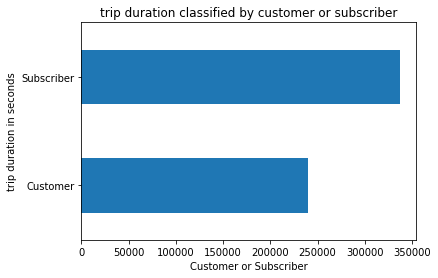

In [10]:
barhg = (df['tripduration'].groupby(df['usertype']).count()).plot(kind='barh')
barhg.set_xlabel('Customer or Subscriber')
barhg.set_ylabel('trip duration in seconds')
barhg.set_title('trip duration classified by customer or subscriber')

Figure 1: trip duration classified by whether the rider is a customer or subscriber. The subscriber's trip durations seems to be about 100,000 seconds more than the customer's. However, we need to continue on with the statistical analysis to confirm if we should reject the null hypothesis.

In [11]:
df[ df['usertype'] == 'Subscriber'].count()

tripduration    337384
usertype        337384
dtype: int64

In [12]:
df[df['usertype'] == 'Customer'].count()

tripduration    240319
usertype        240319
dtype: int64

In [13]:
df[ df['usertype'] == 'Subscriber'].count() / df[df['usertype'] == 'Customer'].count()

tripduration    1.403901
usertype        1.403901
dtype: float64

We might want to add more variables. How about 'birth year'?

In [14]:
dfyear = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
dfyear['date'] = pd.to_datetime(dfyear['starttime'])
dfyear.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'gender', 'date'], axis=1, inplace=True)
dfyear.head()

,tripduration,usertype,birth year
0,695,Subscriber,1983.0
1,693,Subscriber,1984.0
2,2059,Customer,NaN
3,123,Subscriber,1960.0
4,1521,Subscriber,1983.0


In [15]:
dfyear[ dfyear['usertype'] == 'Subscriber'].count()

tripduration    337384
usertype        337384
birth year      337382
dtype: int64

In [16]:
dfyear[dfyear['usertype'] == 'Customer'].count()

tripduration    240319
usertype        240319
birth year           0
dtype: int64

Actually, we shouldn't use the birth year variable, since only those who are subscribers had registered their birth years.

In [17]:
df[df['usertype'] == 'Subscriber'].mean()

tripduration    1101.423426
dtype: float64

In [18]:
df[df['usertype'] == 'Customer'].mean()

tripduration    1753.233523
dtype: float64

# Assignment 8 HW 2:

Taken from the citibike md:

### Hypothesis Formulation:
I believe that the hypothesis are formulated correctly

### Data Verification:
The data has the correct features to answer the question

But I believe that the data representation is not appropriate

because the bar chart only showed the count of trips for two user groups, instead of the average of trip duration for each user group, as stated in the null hypothesis

### Statistical Test:
The independent variable is the type of the user, subscriber or customer

The dependent variabel is the average trip duration

The goal is to testing whether there is a difference between the means of two samples

t test should be used to test this hypothesis

Text(0.5,1,'Average trip duration classified by customer or subscriber')

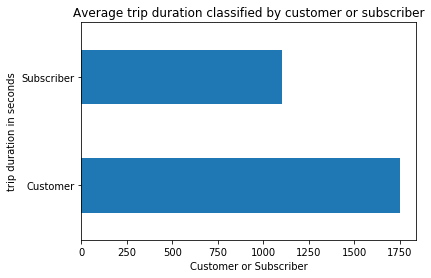

In [20]:
barhg = (df['tripduration'].groupby(df['usertype']).mean()).plot(kind='barh')
barhg.set_xlabel('Customer or Subscriber')
barhg.set_ylabel('trip duration in seconds')
barhg.set_title('Average trip duration classified by customer or subscriber')

### KS Test:

So to do the KS test and t test, I believe it is better to change my hypothesis to correspond to this, since the KS test is two-sided, and the two-sided t test can be tested using the function. the KS test is used to check if the distribution of the samples are the same. 

Computes the Kolmogorov-Smirnov statistic on 2 samples.

This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [26]:
ks = scipy.stats.ks_2samp(df[df['usertype'] == 'Subscriber'].tripduration, df[df['usertype'] == 'Customer'].tripduration)
print (ks)

Ks_2sampResult(statistic=0.27356120416838353, pvalue=0.0)


The KS statistic is very large and the pvalue is very small! We can therefore reject the null hypothesis that the distribution of the two samples are the same.

This is a concern, since the t test function assumes equal sized distribution.

In [27]:
scipy.stats.ttest_ind(df[df['usertype'] == 'Subscriber'].tripduration, df[df['usertype'] == 'Customer'].tripduration)

Ttest_indResult(statistic=-27.064827934997648, pvalue=3.2251912855822132e-161)

This t test assumes equal distribution and variance

In [30]:
scipy.stats.ttest_ind(df[df['usertype'] == 'Subscriber'].tripduration, df[df['usertype'] == 'Customer'].tripduration, equal_var=False)

Ttest_indResult(statistic=-23.821528554633645, pvalue=2.643818232977887e-125)

This t test assumes non equal variance and distribution, and does the welche's t-test.

Both of these t tests gives us a very small p-value and a large t statistic. However, it might be more accurate to calculate it manually. and also calculate whether the variance are similar or not.

In [31]:
stdS = df[df['usertype'] == 'Subscriber'].tripduration.std()

In [32]:
stdC = df[df['usertype'] == 'Customer'].tripduration.std()

In [33]:
stdC

12794.272515902303

In [34]:
stdS

4773.6001263856115

In [35]:
uS = df[df['usertype'] == 'Subscriber'].tripduration.mean()
uC = df[df['usertype'] == 'Customer'].tripduration.mean()

In [36]:
uS

1101.4234255329238

In [37]:
uC

1753.2335229424223

In [38]:
F = (stdS**2)/(stdC**2)
F

0.1392069373864159

In [40]:
nS = len(df[df['usertype'] == 'Subscriber'].tripduration)
nC = len(df[df['usertype'] == 'Customer'].tripduration)

In [41]:
nS

337384

In [42]:
nC

240319

the formula for t-score is

t = $\frac{µ - x}{s / \sqrt{N}}$

In [56]:
t = (uS - uC) / (sqrt((stdS**2 /(nS)) + (stdC**2 / (nC))))

In [57]:
t

-23.821528554633645

In [58]:
dof = nS+nC-2

In [59]:
dof

577701

Critical value with dof 577701: t-test at 1.960.

### Conclusion:

the absolute value of the t-statistic is 23.821. Testing it with the function gave us a p-value of 2.643818232977887e-125, which is extremely close to zero, much less than 0.05. Also, since the t-statistic is much greater than the two-sided critical value at alpha=0.05, which is 1.960, we can safely reject the null hypothesis that there is no difference of trip durations between customer and subscriber riders in favor of the alternative that there is a large difference.